In [1]:
import sys
import numpy as np
sys.path.insert(0,'..')
from fairness import *

In [2]:
# Create synthetic data if it doesn't exist
from os.path import exists
datapath = '../synthetic_data/fairness.csv'
if not exists(datapath):
    np.random.seed(2)
    n_rows = 1000
    n_proxies = 5
    n_characteristics = 5
    df = pd.DataFrame()
    df['unique_id'] = range(n_rows)
    df['consumption'] = 0
    for proxy in range(n_proxies):
        df['proxy' + str(proxy)] = df['consumption'] + np.random.randint(size=n_rows, low=0, high=proxy+5)
    for characteristic in range(n_characteristics):
        n_categories = np.random.randint(low=2, high=7)
        df['characteristic' + str(characteristic)] = np.random.randint(size=n_rows, low=0, high=n_categories)
        df['characteristic' + str(characteristic)] = df['characteristic' + str(characteristic)]\
            .apply(lambda x: 'group' + str(x))
    for proxy in ['proxy0', 'proxy1']:
        df[proxy] = df[proxy] + df['characteristic1'].apply(lambda x: int(x[-1]))
    df['weight'] = np.random.randint(10, 100, size=n_rows)
    df.to_csv(, index=False)

Create the Fairness module by passing in a datastore object.

In [3]:
datastore = DataStore('../configs/config_new.yml', spark=False)
fairness = Fairness(datastore)

## Rank residuals

In [6]:
fairness.rank_residuals_table('consumption', ['proxy0', 'proxy1', 'proxy3'], 'characteristic1')

,proxy0,proxy1,proxy3
characteristic1,,,
group0,-0.23 (0.31),-0.19 (0.33),-0.00 (0.37)
group1,-0.06 (0.34),-0.05 (0.36),0.00 (0.37)
group2,0.06 (0.35),0.07 (0.35),-0.02 (0.38)
group3,0.24 (0.33),0.18 (0.33),0.02 (0.39)
Anova F-Stat,85.335746,50.348236,0.550574
Anova p-value,0.000000,0.000000,0.647841


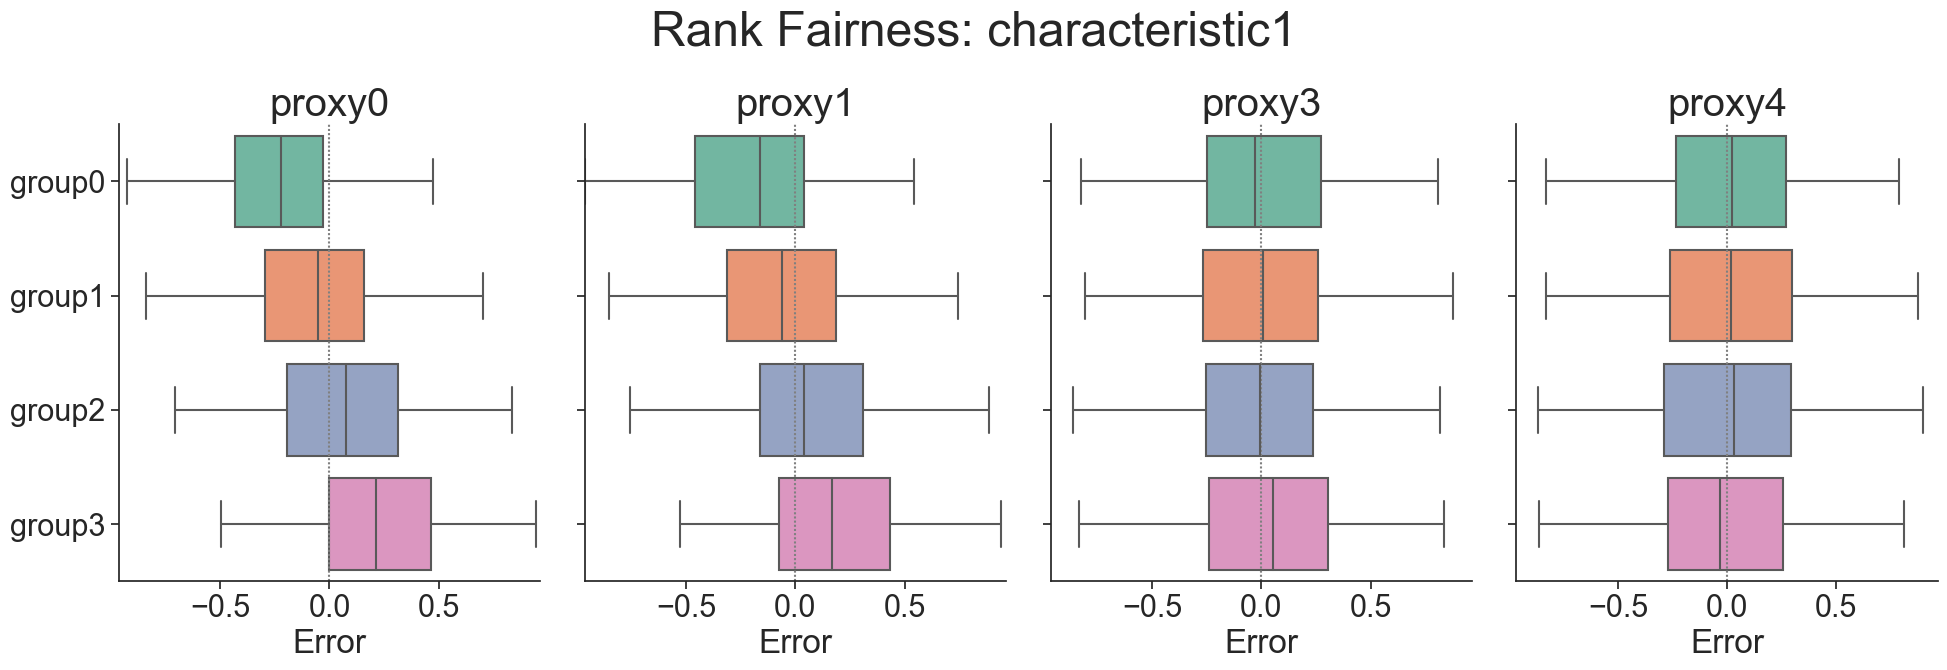

In [5]:
fairness.rank_residuals_plot('consumption', ['proxy0', 'proxy1', 'proxy3', 'proxy4'], 'characteristic1')

## Demographic Parity

In [7]:
fairness.demographic_parity_table('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)

,Group's share of population,Share of Group in Target Population,proxy0,proxy1,proxy2,proxy3
characteristic1,,,,,,
group0,24.90%,28.51%,29.317269,21.285141,-2.008032,-0.401606
group1,25.70%,26.07%,7.392996,9.338521,-3.891051,1.945525
group2,25.90%,26.25%,-10.810811,-10.038610,3.474903,0.386100
group3,23.50%,27.23%,-27.234043,-21.702128,2.553191,-2.127660


..\fairness.py:496: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


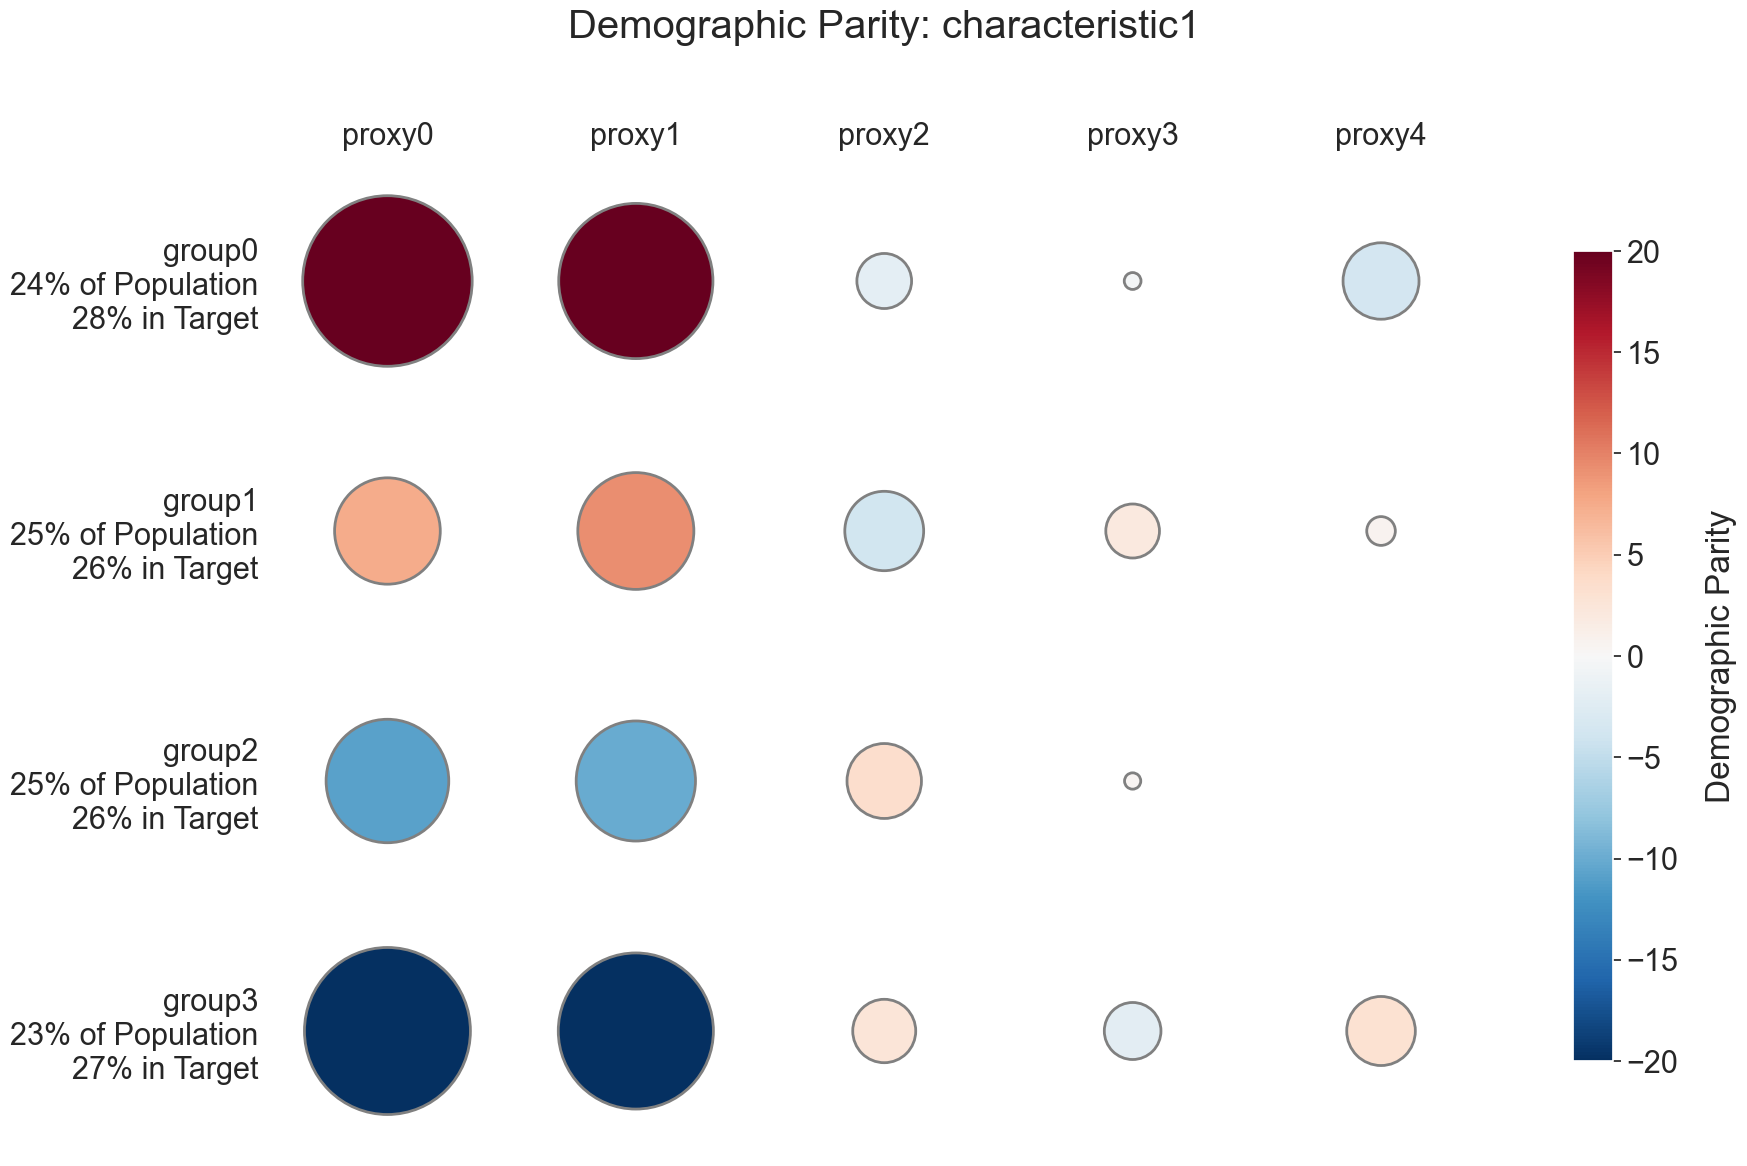

In [8]:
fairness.demographic_parity_plot('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3', 'proxy4'], 
                                 'characteristic1', 27)

## Independence

Independence requires you to pass a p-value in which the top p% of your population will be targeted based on your proxy variables.

In [13]:
fairness.independence_table('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)

,Group's share of population,proxy0,proxy1,proxy2,proxy3
characteristic1,,,,,
group0,24.90%,0.5783,0.4980,0.2651,0.2811
group1,25.70%,0.3346,0.3541,0.2218,0.2802
group2,25.90%,0.1544,0.1622,0.2973,0.2664
group3,23.50%,0.0000,0.0553,0.2979,0.2511
ind_pval,,0.0000,0.0000,0.1742,0.8649


..\fairness.py:496: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


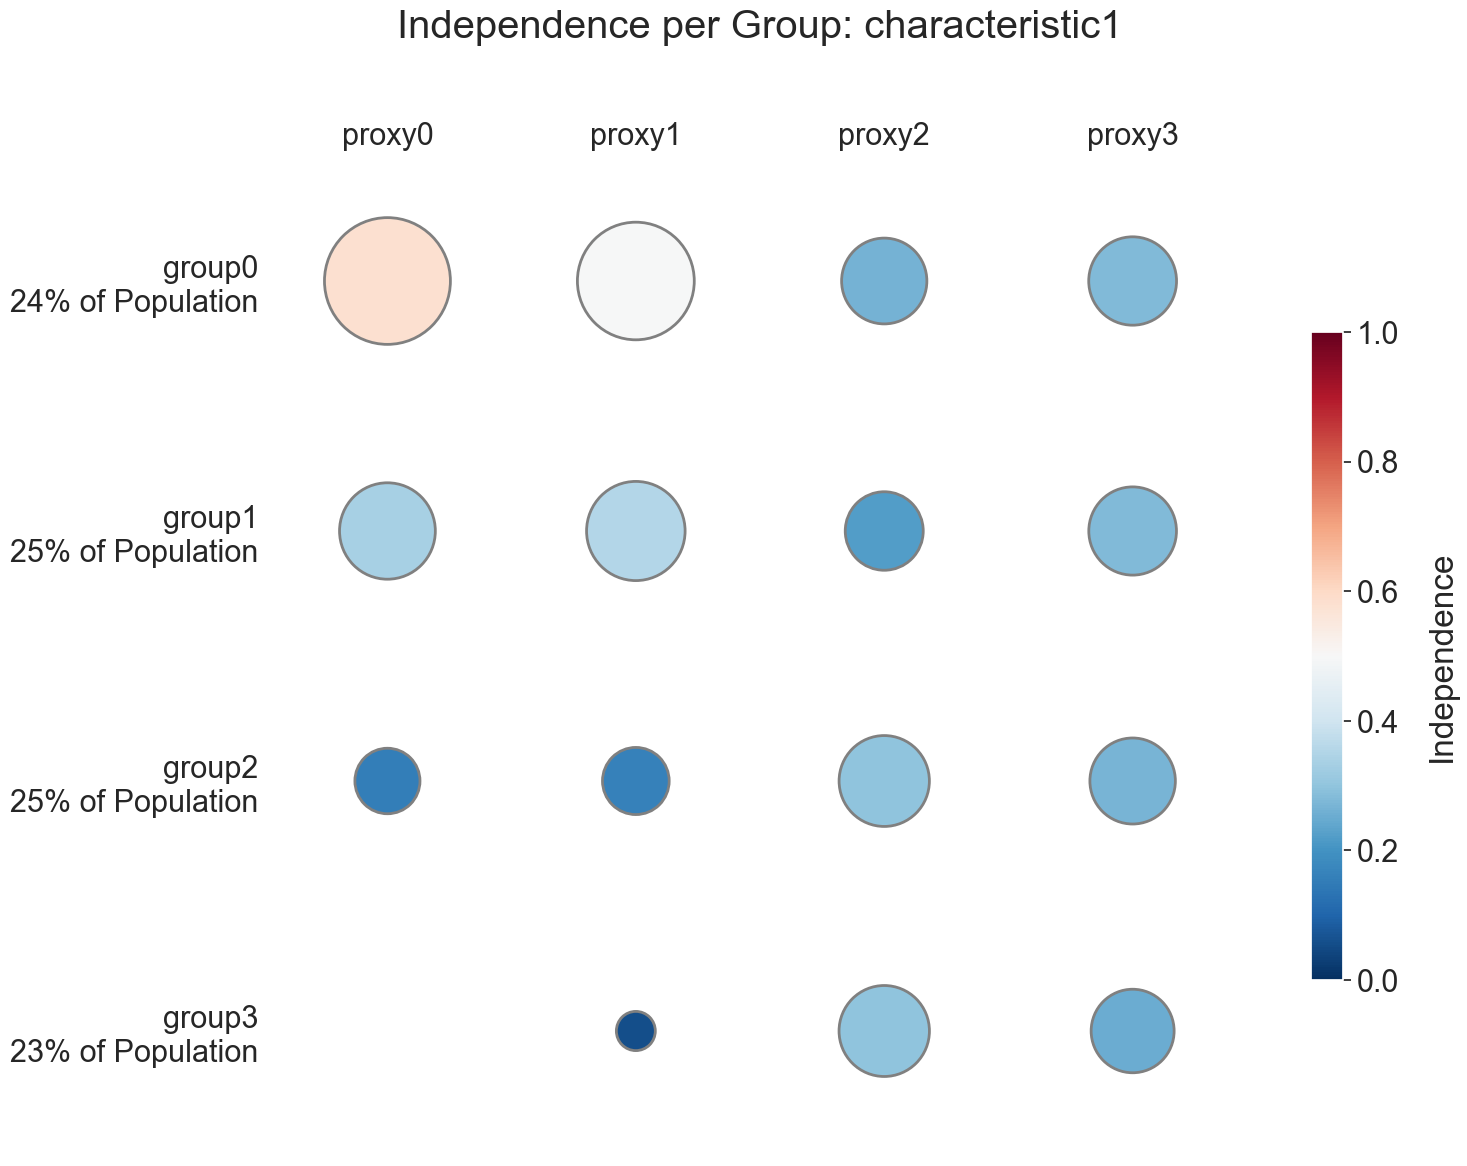

In [14]:
fairness.independence_plot('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', p=27)

## Recall per group / Separation

Recall per group (analogous to separation) requires you to pass a p-value in which the top p% of your population will be targeted based on your proxy variables.

In [10]:
fairness.recall_table('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)

,Group's share of population,proxy0,proxy1,proxy2,proxy3
characteristic1,,,,,
group0,24.90%,0.6761,0.6479,0.2113,0.3662
group1,25.70%,0.3433,0.4776,0.2090,0.3134
group2,25.90%,0.1029,0.2206,0.2794,0.2647
group3,23.50%,0.0000,0.2031,0.2344,0.3594
ind_pval,,0.0000,0.0000,0.7474,0.5605


..\fairness.py:496: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


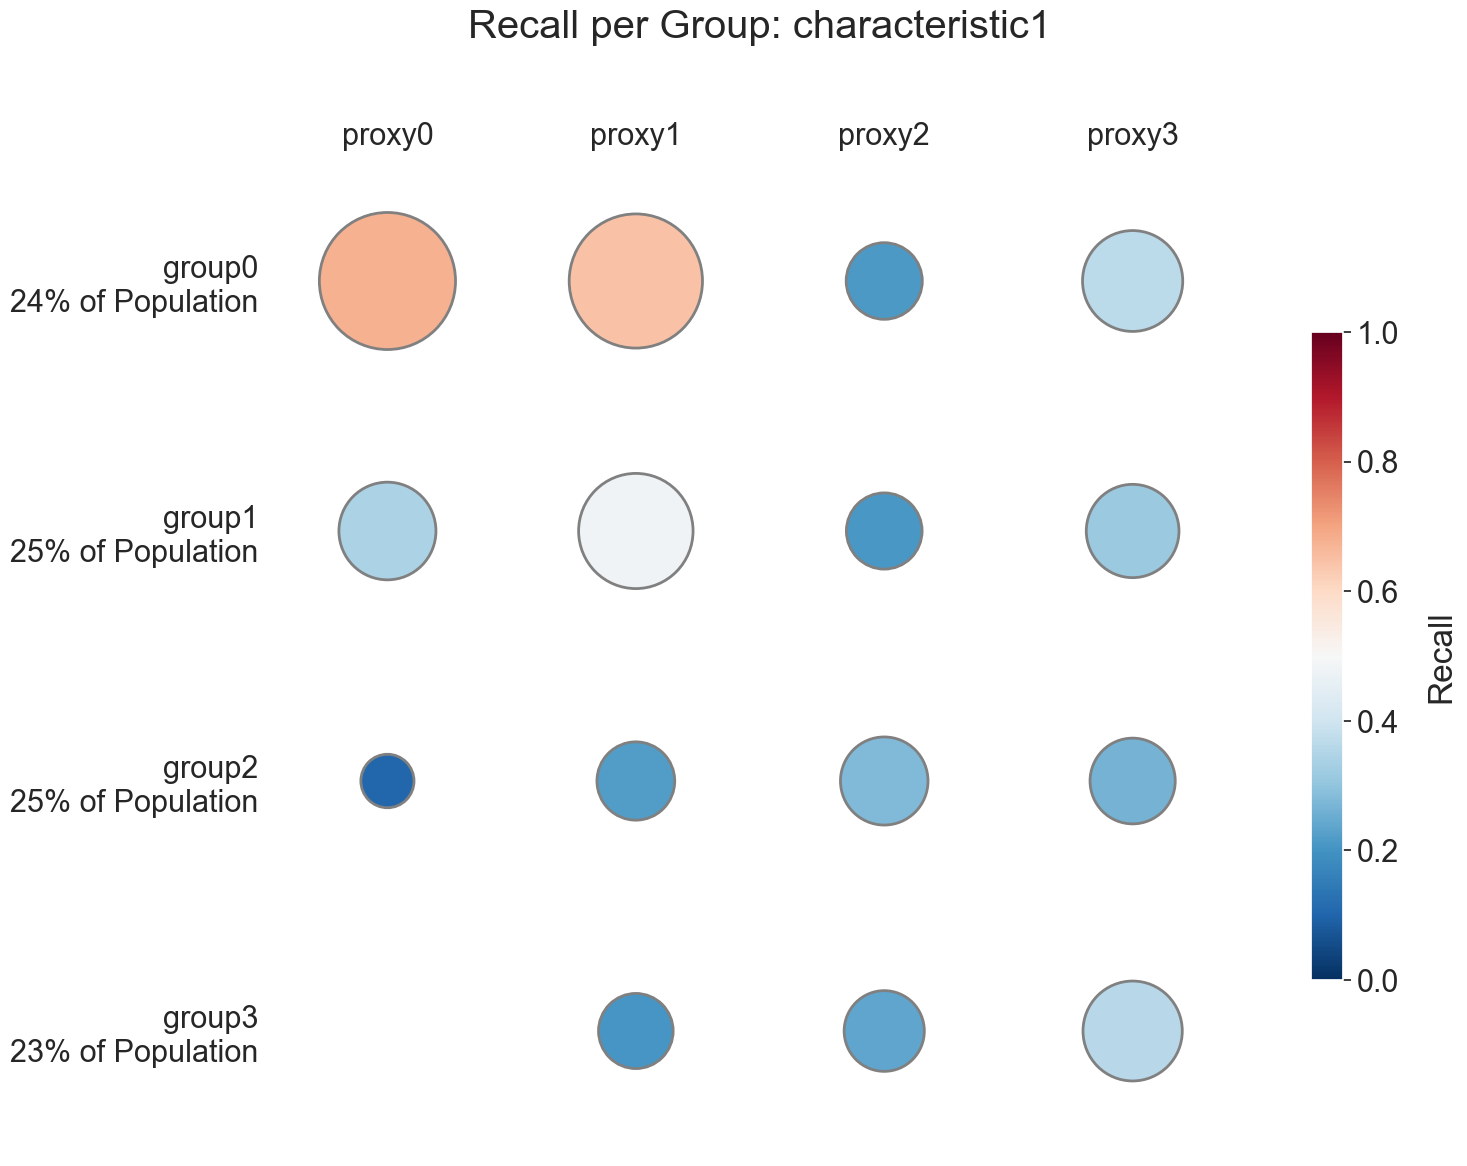

In [11]:
fairness.recall_plot('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)

## Precision per group / Separation

Recall per group (analogous to separation) requires you to pass a p-value in which the top p% of your population will be targeted based on your proxy variables.